# EX1

Formatação é um probelma classifico no universo de visão computacional, pois imagens por padrão aprensentam uma grande quantidade de informação de intensiadedes, aspectos de cor, e por as vezes se tratarem de uma grande quantidade de pixels o problema fica do tamanho desses arquivos fica cada vez maior. Por isso existem diversos tipos de formatos para imagem cada um com um contexto onde melhor se aplica.

In [1]:
%matplotlib  inline

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [2]:
def saveJPEG(path, image, jpg_quality):
    cv2.imwrite(path, image, [int(cv2.IMWRITE_JPEG_QUALITY), jpg_quality])

In [3]:
def saveTIFF(path,image):
    cv2.imwrite(path, image)

In [4]:
def calculaErro(img, img2):
    return ((img - img2) ** 2).mean()

In [5]:
def calculaTamanho(path):
    return os.path.getsize(path)

In [6]:
imgname = 'VisaoTrab1'

img = cv2.imread(imgname + '.tiff',1)
tamanho_img = calculaTamanho(imgname + '.tiff')

## JPEG

In [7]:
qualities = [10,50,90]
for q in qualities:
    outpath_jpeg = imgname + '_' + str(q) + '.jpeg'
    saveJPEG(outpath_jpeg,img,q)
    img_jpeg = cv2.imread(outpath_jpeg,1)
    print("O erro da imagem JPEG com qualidade {} foi de {}, e tamanho {} bytes".
          format(q, calculaErro(img, img_jpeg), calculaTamanho(outpath_jpeg)))

O erro da imagem JPEG com qualidade 10 foi de 40.22854487101237, e tamanho 6823 bytes
O erro da imagem JPEG com qualidade 50 foi de 8.64175796508789, e tamanho 13226 bytes
O erro da imagem JPEG com qualidade 90 foi de 3.39178466796875, e tamanho 35895 bytes


Com as imagens JPEG podemos perceber que ao aumentarmos a qualidade também aumentamos seu tamanho, isso porque estamos salvando mais informação no arquivo, conseqentemente mais bytes.

Também notamos que o erro médio cai a medida que aumentamos a qualidade, isso porque temos a informação sobre mais pixels e assim temos uma imagem mais fiel.

## TIFF

In [8]:
outpath_tiff = imgname + '_tiff_novo' + '.tiff'
saveTIFF(outpath_tiff,img)
img_tiff = cv2.imread(outpath_tiff,1)
print("O erro da imagem TIFF foi de {}, e tamanho {} bytes".
    format(calculaErro(img, img_jpeg), calculaTamanho(outpath_tiff)))
print("A imagem original tem {} bytes".format(tamanho_img))

O erro da imagem TIFF foi de 3.39178466796875, e tamanho 319654 bytes
A imagem original tem 786754 bytes


O erro medio apresentado pela imagem salva utilizando o formato TIFF foi 0, isso porque esse formato permite armazenar a imagem sem perda de qualidade e informação.

E devido a compressão LZW podemos perceber uma redução de mais de 50% no tamanho da imagem.

## TIFF VS JPEG

O formato TIFF é um formato mais complexo e requer muito mais informação do que o padrão JPEG, uma vez que é capaz de armazenar informações sem perda, porem o arquivo.tiff acaba tendo 10x mais bytes do que um JPEG com 90% de qualidade.

Porém o formato JPEG sempre resulta em perda de qualidade da imagem e isso deve ser sempre lembrado quando utilizar esse formato.

O formato TIFF é ideal para objetivos onde qualidade é essencial e memória está presente em grande escala, porém caso se não houver necessidade de uma qualidade impecável, o formato JPEG apresenta resultados excelentes com uma fração do tamanho 

# EX2

Para aplicar o filtro de gama, iremos operar sobre o brilho da imagem, por isso o formato HSV ira ser bastante util, pois o V é o coeficiente de brilho do pixel.

Além disso o openCV utiliza a escala 0-255 para intensidade, a fim de aplicar corretamente o filtro, e evitar saturação devemos normalizar os valores.

Com os valores normalizados podemos elevar o brilho ao gama para todos os pixel.

Com os novos valores de brilho, basta agora transformar a imagem para o padrão BGR do openCV e teremos uma imagem nova com o gama corrigido.

In [18]:
def histograma(img):
    mpl.rc("savefig", dpi = 150)
    rows, cols, aux = img.shape
    hist, bins = np.histogram(img , range =(0,256), bins =64)
    hist = hist / float(rows*cols)
    center = (bins [:-1] + bins [1:])/ 2
    plt.bar(center , hist ,color='m', width =4)
    plt.xlim ([0 ,256])
    plt.ylim ([0 ,0.1])
    plt.ylabel('$p(f(x,y))$', fontsize =16)
    plt.xlabel('Intensidade ', fontsize =16)
    m_y = 0.005
    m = np.mean(img)
    s = np.std(img)
    plt.plot(m, m_y , "ko")
    plt.plot([m - s, m + s], [m_y] * 2, "k--");
    plt.savefig('jimiOrigHist.eps')
    plt.show()
    print  ('\nMedia: ', np.mean(img))
    print  ('Desvio Padrao: ',np.std(img))

In [10]:
def aplica_filtro_gama(img, gamma):
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    v = hsv[:, :,2]
    v_double = v / 255
    v_double_gama = v_double ** gamma
    v_gama = v_double_gama * 255
    hsv[:, :, 2] = v_gama

    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

Para aplicar a corregir a luminancia no rosto do bebe, devemos aplicar um filtro de gama > 1, pois com isso a parte escura do rosto do bebe, tera seu constraste ampliado e será mais visivel.

In [11]:
gamma = 0.5
img_gama = aplica_filtro_gama(img,gamma)
cv2.imwrite(imgname + "_correcao_gama.tiff", img_gama)

True

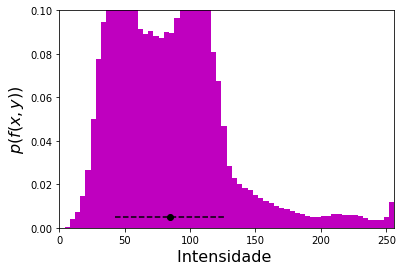


Media:  84.44746780395508
Desvio Padrao:  42.1937009533185


In [21]:
histograma(img)

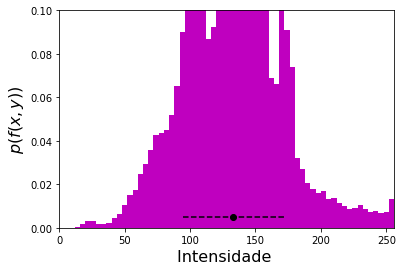


Media:  133.07843271891275
Desvio Padrao:  38.87477532248105


In [22]:
histograma(img_gama)

Como podemos observar nos histogramas a imagem sem filtro de cama apresenta grande parte de seus pixels com intensidade baixas, ou seja mais escuras, ao aplicar o filtro de gama podemos observar um desvio da media dos valores para 133, tornando a imagem mais clara e visivel